In [1]:
%matplotlib notebook
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

py.offline.init_notebook_mode(connected=True)

In [46]:
fname1 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/ITU-MOM/ITU-MOM_GSexps.nc'
ds1 = xr.open_mfdataset(fname1)

fname2 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/MITB500/MIT_MITB500.nc'
ds2 = xr.open_mfdataset(fname2)

fname3 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/Brest/Brest_GSexps.nc'
ds3 = xr.open_mfdataset(fname3)

fname4 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/NorESM/NorESM_GS_experiments.nc'
ds4 = xr.open_mfdataset(fname4)

In [49]:
dates1 = pd.date_range('1980-01', freq='M', periods=12*29)
ds1['time'] = dates1
ds2['Time'] = dates2
s3['time'] = dates3
ds4['TIME'] = dates4

<IPython.core.display.Javascript object>


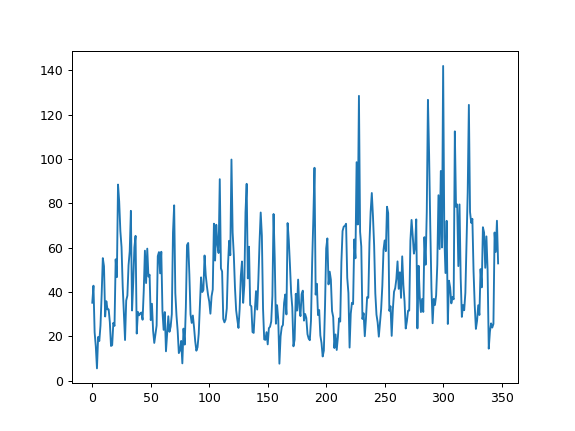

In [4]:
plt.figure()
plt.plot(ds1.ctlbarents_heatinflow)



<IPython.core.display.Javascript object>


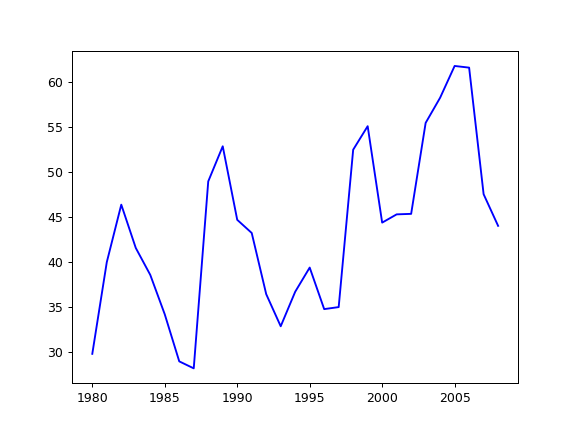

<IPython.core.display.Javascript object>


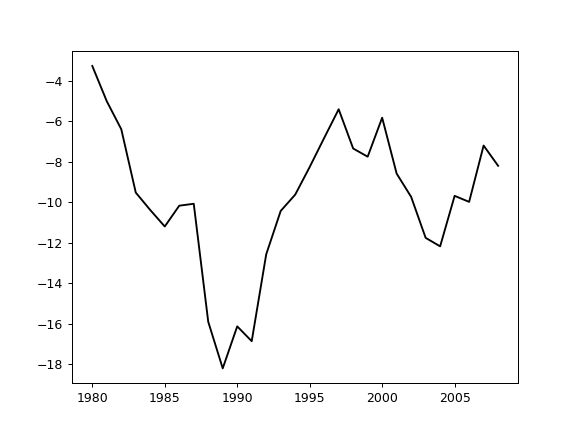

In [5]:
plt.figure()
plt.plot(ds1.ctlbarents_heatinflow.groupby('time.year').mean().year,
         ds1.ctlbarents_heatinflow.groupby('time.year').mean(),'b')
plt.figure()
plt.plot(ds1.ctlbarents_heatinflow.groupby('time.year').mean().year,
         ds1.gsnbarents_heatinflow.groupby('time.year').mean()-ds1.ctlbarents_heatinflow.groupby('time.year').mean(),
         'k')


<IPython.core.display.Javascript object>


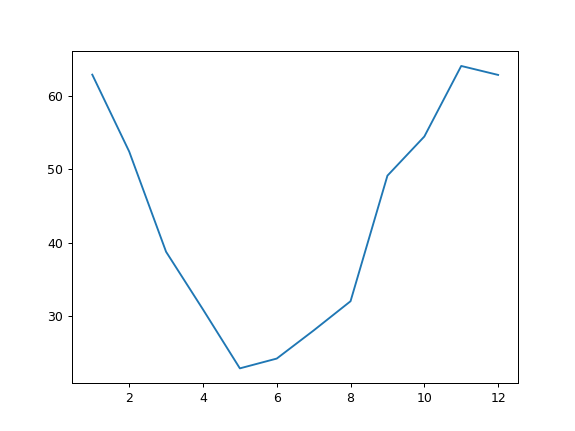

<IPython.core.display.Javascript object>


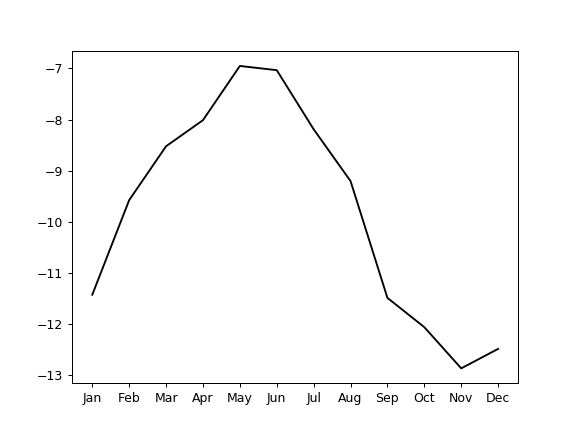

([<matplotlib.axis.XTick at 0x147d74bcf090>,
 <a list of 12 Text xticklabel objects>)

In [6]:
plt.figure()
plt.plot(ds1.ctlbarents_heatinflow.groupby('time.month').mean().month,ds1.ctlbarents_heatinflow.groupby('time.month').mean())
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
#            ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

plt.figure()
plt.plot(ds1.gsnbarents_heatinflow.groupby('time.month').mean()-ds1.ctlbarents_heatinflow.groupby('time.month').mean(),'k')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
            ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

<IPython.core.display.Javascript object>


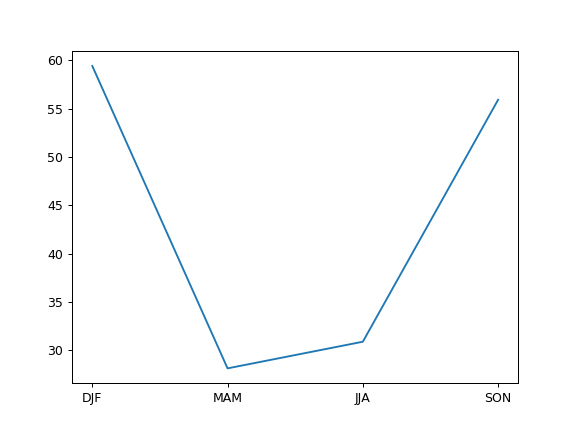

([<matplotlib.axis.XTick at 0x147d74af0e90>,
 <a list of 4 Text xticklabel objects>)

In [7]:
plt.figure()
plt.plot(ds1.ctlbarents_heatinflow.groupby('time.season').mean())
plt.xticks([0, 1, 2, 3],
            ["DJF", "MAM", "JJA", "SON"])
#           ["Jan\n2009", "Feb\n2009", "Mar\n2009", "Apr\n2009", "May\n2009"])

<IPython.core.display.Javascript object>


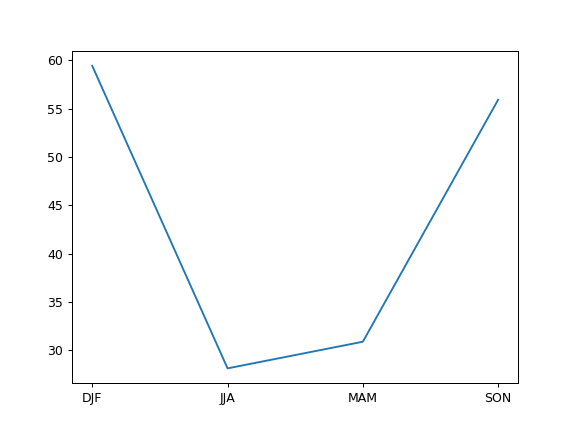

In [8]:
plt.figure()
plt.plot(ds1.ctlbarents_heatinflow.groupby('time.season').mean().season,ds1.ctlbarents_heatinflow.groupby('time.season').mean())

In [62]:
x1 = np.copy(ds1.ctlbarents_heattotal.groupby('time.year').mean().year)
x2 = np.copy(ds2.barht_c[0].groupby('Time.year').mean().year)
x3 = np.copy(ds3.Beringrefheat.groupby('time.year').mean().year)
x4 = np.copy(ds4.ht_NorESM_BSO_ctrl.groupby('TIME.year').mean().year)

d1 = np.copy(ds1.gspbarents_heattotal.groupby('time.year').mean()
            -ds1.ctlbarents_heattotal.groupby('time.year').mean())
d2 = np.copy(ds2.barht_gsp[0].groupby('Time.year').mean()
            -ds2.barht_c[0].groupby('Time.year').mean())
d3 = np.copy(ds3.BSOgspheat.groupby('time.year').mean()
            -ds3.BSOrefheat.groupby('time.year').mean())
d4 = np.copy(ds4.ht_NorESM_BSO_gsp.groupby('TIME.year').mean()
            -ds4.ht_NorESM_BSO_ctrl.groupby('TIME.year').mean())

# only from 1980 to 2009
#x2 = x2[:29]
#d2 = d2[:29]
#x3 = x3[:29]
#d3 = d3[:29]
#x4 = x4[1:-1]
#d4 = d4[1:-1]


layout = go.Layout(
    title='<b>Heat Transport Anomaly</b>',
    yaxis=dict(
        title='HT [TW]',
        range=[-30, 30]
    ),
    xaxis=dict(
        title='years'
    )
)    

trace1 = go.Scatter(
    x=x1,
    y=d1,
    mode='lines',
    name='ITU',
    line=dict(
        color='blue',
        width=2,
        shape='smooth'
    )
)

trace2 = go.Scatter(
    x=x2,
    y=d2,
    mode='lines',
    name='MITB500',
    line=dict(
        color='black',
        #dash='dash',
        width=2,
        shape='smooth'
    )
)

trace3 = go.Scatter(
    x=x3,
    y=d3,
    mode='lines',
    name='Brest',
    line=dict(
        color='brown',
        #dash='dash',
        width=2,
        shape='smooth'
    )
)

trace4 = go.Scatter(
    x=x4,
    y=d4,
    mode='lines',
    name='NorESM',
    line=dict(
        color='red',
        #dash='dash',
        width=2,
        shape='smooth'
    )
)

fig = go.Figure(data=[trace1, trace2, trace3, trace4], layout=layout)
py.offline.iplot(fig)

In [84]:
x1 = np.copy(ds1.ctlbarents_heatinflow.groupby('time.month').mean().month)
d1 = np.copy(ds1.gspbarents_heattotal.groupby('time.month').mean()
            -ds1.ctlbarents_heattotal.groupby('time.month').mean())
d2 = np.copy(ds1.gsnbarents_heattotal.groupby('time.month').mean()
            -ds1.ctlbarents_heattotal.groupby('time.month').mean())

layout = go.Layout(
    title='<b>Heat Transport Anomaly</b>',
    yaxis=dict(
        title='HT [TW]',
        range=[-14, 14]
    ),
    xaxis=dict(
        title='month'
    )
)    

trace1 = go.Scatter(
    x=x1,
    y=d1,
    mode='lines',
    name='GSp',
    line=dict(
        color='blue',
        width=2,
        shape='smooth'
    )
)

trace2 = go.Scatter(
    x=x1,
    y=d2,
    mode='lines',
    name='GSn',
    line=dict(
        color='blue',
        dash='dash',
        width=2,
        shape='smooth'
    )
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
py.offline.iplot(fig)

In [63]:
timeall = {}
timeall['ITU'] = x1
timeall['MITB500'] = x2
timeall['Brest'] = x3
timeall['NorESM'] = x4

dataall = {}
dataall['ITU'] = d1
dataall['MITB500'] = d2
dataall['Brest'] = d3
dataall['NorESM'] = d4

modelnames = ['ITU' , 'MITB500', 'Brest', 'NorESM']


layout = go.Layout(
    title='<b>Heat Transport Anomaly</b>',
    yaxis=dict(
        title='HT [TW]',
        #range=[-14, 14]
    ),
    xaxis=dict(
        title='year'
    )
)    


def update_plot(models):
    
    data = []
    for mdl in models:
        trace1 = go.Scatter(
            x=timeall[mdl],
            y=dataall[mdl],
            mode='lines',
            name=mdl,
            line=dict(
                width=2,
                shape='smooth'
            )
        )
        data.append(trace1)

    fig = go.Figure(data=data, layout=layout)
    py.offline.iplot(fig)
    
models = widgets.SelectMultiple(options=list(modelnames), value=modelnames, description='Models')    

widgets.interactive(update_plot,models=models)
    

In [59]:
#x2 = ds2.barht_c[0].groupby('Time.year').mean()
#print x2
x4 = np.copy(ds4.ht_NorESM_BSO_ctrl.groupby('TIME.year').mean().year)
#print x4
x4[1:-1]


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])

In [58]:
x3

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008])